C:\Users\sujit\AppData\Local\Temp\ipykernel_62932\2123264659.py:48: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cities, y=temperatures, ax=ax[0], palette="coolwarm")
C:\Users\sujit\AppData\Local\Temp\ipykernel_62932\2123264659.py:53: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cities, y=humidities, ax=ax[1], palette="Blues")


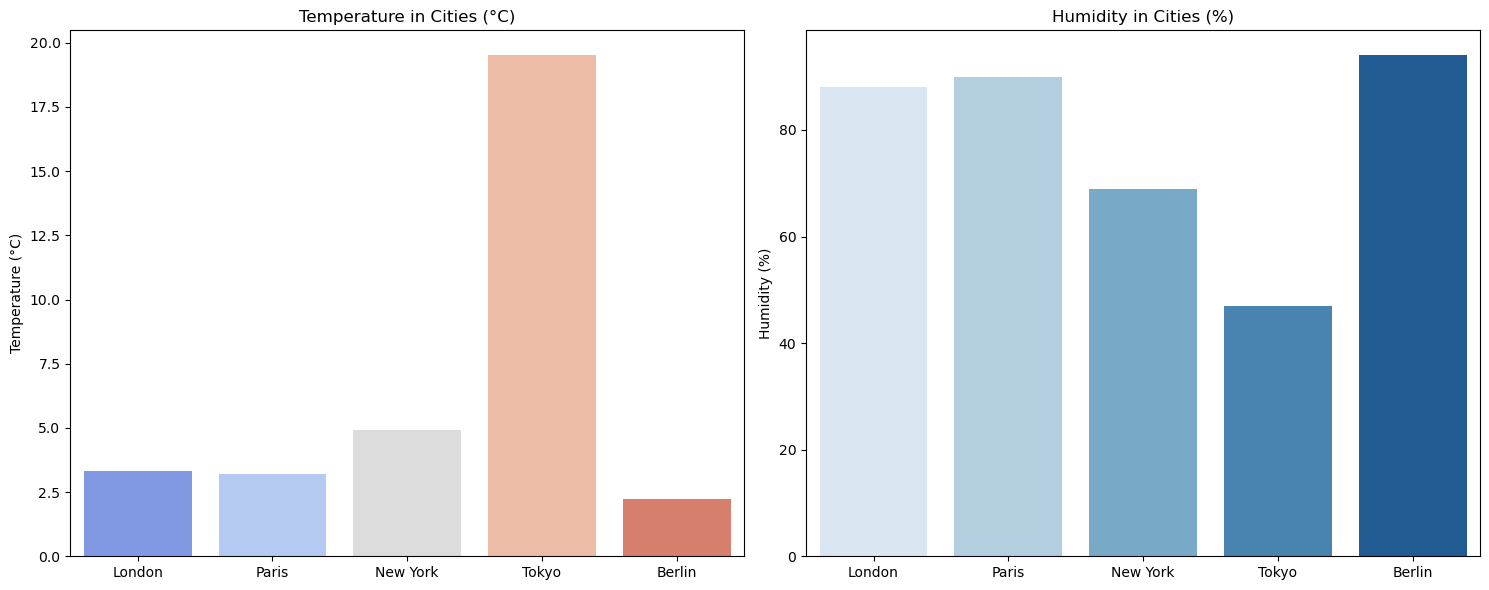

In [13]:
import requests
import json
import matplotlib.pyplot as plt
import seaborn as sns

# OpenWeatherMap API Configuration
API_KEY = 'a728ff9e19d55e81abbdaedf0a4a9240'  # Replace with your actual API key
BASE_URL = "http://api.openweathermap.org/data/2.5/weather"

# List of cities to fetch data for
cities = ["London", "Paris", "New York", "Tokyo", "Berlin"]

# Lists to store extracted data
temperatures = []
humidities = []

# Function to fetch weather data
def get_weather_data(city):
    try:
        response = requests.get(BASE_URL, params={"q": city, "appid": API_KEY, "units": "metric"})
        data = response.json()
        if data.get("cod") == 200:
            return data
        else:
            print(f"Error fetching data for {city}: {data.get('message')}")
            return None
    except Exception as e:
        print(f"Request failed for {city}: {e}")
        return None

# Fetch data for each city
for city in cities:
    weather_data = get_weather_data(city)
    if weather_data:
        temperature = weather_data["main"]["temp"]  # Temperature in Celsius
        humidity = weather_data["main"]["humidity"]
        
        temperatures.append(temperature)
        humidities.append(humidity)
    else:
        temperatures.append(None)
        humidities.append(None)

# Visualization Dashboard
fig, ax = plt.subplots(1, 2, figsize=(15, 6))

# Temperature Bar Plot
sns.barplot(x=cities, y=temperatures, ax=ax[0], palette="coolwarm")
ax[0].set_title("Temperature in Cities (°C)")
ax[0].set_ylabel("Temperature (°C)")

# Humidity Bar Plot
sns.barplot(x=cities, y=humidities, ax=ax[1], palette="Blues")
ax[1].set_title("Humidity in Cities (%)")
ax[1].set_ylabel("Humidity (%)")

plt.tight_layout()
plt.show()